# Experiment: Generate Precision/Recall Curves for Cell-Level Similarity

In [3]:
# Imports and Environmental Setup

import sys
sys.path.insert(0, '..')

import warnings
from tqdm import TqdmExperimentalWarning
warnings.simplefilter('ignore', TqdmExperimentalWarning)

import matplotlib
%matplotlib inline

import ipywidgets
import pandas as pd
import numpy as np

import dataset as ds
import networkx as nx

from lineage import similarity, graphs


In [4]:
RESULT_DIR = '/home/suhail/Projects/relic/primitives/python/generator/results/pc2_intra_tie_breaker/'
NB_NAME = '20200131-163550'

In [5]:
# Given a specific workflow graph with edge weights, prune edges below threshold
def get_subgraph_threshold(graph, threshold):
    g_copy = graph.copy()
    to_remove = [(u,v) for u,v in graph.edges if graph[u][v]['weight'] < threshold]
    
    for u,v in to_remove:
        g_copy.remove_edge(u,v)
        
    return g_copy

In [6]:
from tqdm import tqdm_notebook

# Given a dataset, run jaccard similarity pairwise and prune edges based on threshold range and generate
# precision/recall curve
def generate_pairwise_pr_curve(base_dir=RESULT_DIR, nb_name=NB_NAME):
    pr_df = pd.DataFrame(columns = ['rows', 'columns', 'versions', 'threshold', 'precision', 'recall'])
    
    wf_dir = base_dir + nb_name
    artifact_dir = wf_dir+'/artifacts/'
    
    dataset = ds.build_df_dict_dir(artifact_dir)

    g_truth = nx.read_gpickle(wf_dir + '/' + nb_name + '_gt_fixed.pkl')
    
    if '0.csv' not in dataset:
        root_node = nv.topological_sort(g_truth)[0] #TODO: Check more than one root issues
    else:
        root_node = '0.csv'

    
    pairwise_jaccard = similarity.get_pairwise_similarity(dataset, similarity.compute_jaccard_DF, threshold=-1.0)
    pw_jaccard_graph = graphs.generate_pairwise_graph(pairwise_jaccard)
    
    threshold_range = np.arange(0,1,0.01)
    
    for threshold in tqdm_notebook(threshold_range, desc='threshold', leave=False):
        threshold_subgraph = get_subgraph_threshold(pw_jaccard_graph, threshold)
        jaccard_spanning_tree = graphs.generate_spanning_tree(threshold_subgraph)
        result = graphs.get_precision_recall(g_truth, threshold_subgraph)
        pr_df = pr_df.append({
            'rows': dataset[root_node].shape[0],
            'columns': dataset[root_node].shape[1],
            'versions': len(dataset),
            'threshold': threshold,
            'precision': result['Precision'],
            'recall': result['Recall'],
        }, ignore_index=True)
    
    return pr_df
        

In [7]:
pr_df=generate_pairwise_pr_curve()

/home/suhail/anaconda3/envs/relic/lib/python3.7/site-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [12]:
pr_df

,rows,columns,versions,threshold,precision,recall
0,100.0,10.0,20.0,0.00,1.000000,0.100000
1,100.0,10.0,20.0,0.01,1.000000,0.104396
2,100.0,10.0,20.0,0.02,1.000000,0.107345
3,100.0,10.0,20.0,0.03,1.000000,0.111111
4,100.0,10.0,20.0,0.04,1.000000,0.111111
...,...,...,...,...,...,...
95,100.0,10.0,20.0,0.95,0.263158,0.833333
96,100.0,10.0,20.0,0.96,0.263158,0.833333
97,100.0,10.0,20.0,0.97,0.263158,0.833333
98,100.0,10.0,20.0,0.98,0.263158,0.833333


Text(0, 0.5, 'precision')

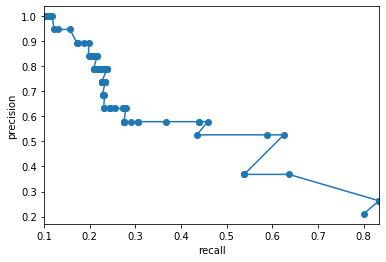

In [9]:
ax = pr_df.plot.line('recall', 'precision', marker="o",legend=False)
ax.set_ylabel('precision')

# Experiments

In [115]:
# Graph Parameters
size = (10000,10)
versions = [5,10,20,50,100,1000]
scale = 1.5

threshold_range = np.linspace(0,1,20)

In [116]:
pr_df = pd.DataFrame(columns = ['rows', 'columns', 'versions', 'threshold', 'precision', 'recall'])

for version in versions:
    ds,errors = pandasgen.generate__dataset(size, version, scale=scale)
    pr_df = pr_df.append(generate_pairwise_pr_curve(ds,threshold_range), ignore_index=True)


/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)
/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)
/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)
/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)
/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'str' and 'float', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)
/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'float' and 'str', sort order is und

/home/suhail/Projects/Lineage-Inference/reconstruction/pandasgen.py:116: FutureWarning: '_agg_assign' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  method = getattr(df.groupby(col), func)
/home/suhail/Projects/Lineage-Inference/reconstruction/pandasgen.py:173: FutureWarning: '_agg_assign_assign' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  return df.sort_values(by=col, ascending=choice)


/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)
/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)
/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'str' and 'float', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)
/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'float' and 'str', sort order is und

In [131]:
def plot_pr_curves(pr_df):
    pr_df['versions'] = pr_df['versions'].astype('int')

    fig, ax = plt.subplots()
    for key, grp in pr_df.groupby(['versions']):
        ax = grp.plot.line(ax=ax,  x='recall', y='precision', label=key, marker='o')

    ax.legend(title='#versions')
    ax.set_ylabel('precision')
    ax.set_title('PR Curve')
    plt.show()

# Sort Order Pruning

In [127]:
def get_edge_thresholds(graph):
    return sorted(set([graph[u][v]['weight'] for u,v in graph.edges]))

In [135]:
def prune_edges(graph, threshold):
    g_copy = graph.copy()
    to_remove = [(u,v) for u,v in graph.edges if graph[u][v]['weight'] == threshold]
    
    for u,v in to_remove:
        g_copy.remove_edge(u,v)
        
    return g_copy

In [129]:
get_edge_thresholds(pw_jaccard_graph)

[0,
 0.1,
 0.16666666666666666,
 0.2,
 0.25,
 0.3333333333333333,
 0.4444444444444444,
 0.5,
 0.625,
 0.6666666666666666,
 0.75,
 0.7777777777777778,
 0.8,
 0.8571428571428571,
 0.875,
 0.8888888888888888,
 1.0]

In [193]:
from tqdm import tqdm_notebook

def generate_sorted_pairwise_pr_curve(ds):
    pr_df = pd.DataFrame(columns = ['rows', 'columns', 'versions', 'threshold', 'precision', 'recall'])
    
    #Generate Dataset
    dataset = load_dataset_list(ds) 
    pairwise_jaccard = get_pairwise_similarity(dataset, compute_jaccard_DF_index, threshold=-1.0)
    pw_jaccard_graph = generate_pairwise_graph(pairwise_jaccard)
    thresholds = get_edge_thresholds(pw_jaccard_graph)
    
    for threshold in tqdm_notebook(thresholds, desc='threshold', leave=False):
        threshold_subgraph = get_subgraph_threshold(pw_jaccard_graph, threshold)
        jaccard_spanning_tree = generate_spanning_tree(threshold_subgraph)
        result = get_precision_recall(ds.lineage.graph, jaccard_spanning_tree)
        pr_df = pr_df.append({
            'rows': ds.dataset[0].shape[0],
            'columns': ds.dataset[0].shape[1],
            'versions': len(ds),
            'threshold': threshold,
            'precision': result['Precision'],
            'recall': result['Recall'],
        }, ignore_index=True)
    
    return pr_df

In [194]:
# Graph Parameters
size = (10000,10)
versions = [5,10,20,50,100]
scale = 1.5

threshold_range = np.linspace(0,1,20)

In [195]:
pr_df = pd.DataFrame(columns = ['rows', 'columns', 'versions', 'threshold', 'precision', 'recall'])

for version in versions:
    ds,errors = pandasgen.generate__dataset(size, version, scale=scale)
    pr_df = pr_df.append(generate_sorted_pairwise_pr_curve(ds), ignore_index=True)


/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:969: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)


/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)
/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)
/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'str' and 'float', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)
/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'str' and 'float', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)
/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)
/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'float' and 'str', sort order is und

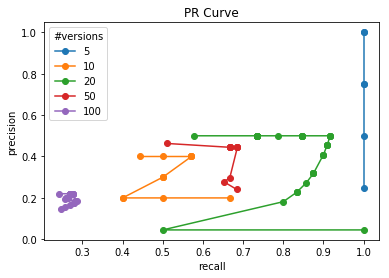

In [196]:
plot_pr_curves(pr_df)

In [141]:
dataset = load_dataset_list(ds) 
pairwise_jaccard = get_pairwise_similarity(dataset, compute_jaccard_DF_index, threshold=-1.0)
pw_jaccard_graph = generate_pairwise_graph(pairwise_jaccard)
thresholds = get_edge_thresholds(pw_jaccard_graph)

/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)
/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)
/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'str' and 'float', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)
/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'float' and 'str', sort order is und

In [142]:
get_edge_thresholds(pw_jaccard_graph)

[0,
 0.1111111111111111,
 0.16666666666666666,
 0.2,
 0.20622,
 0.22639148095290373,
 0.25,
 0.3333333333333333,
 0.4,
 0.5,
 0.6,
 0.6666666666666666,
 0.8,
 0.9109,
 1.0]

In [181]:
import matplotlib


def print_graph_scores(graph):
    x = [graph[u][v]['weight'] for u,v in graph.edges]

    df = pd.DataFrame({'score':np.round(x, decimals=4)})
    df = df.score.value_counts().sort_index()
    ax = df.plot.bar()

    #plt.yscale('log')
    #plt.grid(True)
    #plt.table(cellText=[df.score.value_counts().tolist()], rowLabels=[['count']])

    labels = df
    rects = ax.patches

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
                ha='center', va='bottom')


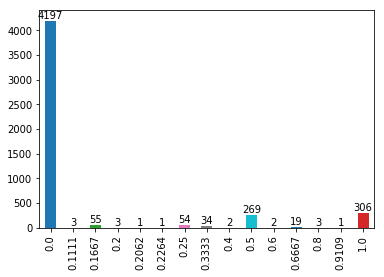

In [182]:
print_graph_scores(pw_jaccard_graph)

/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


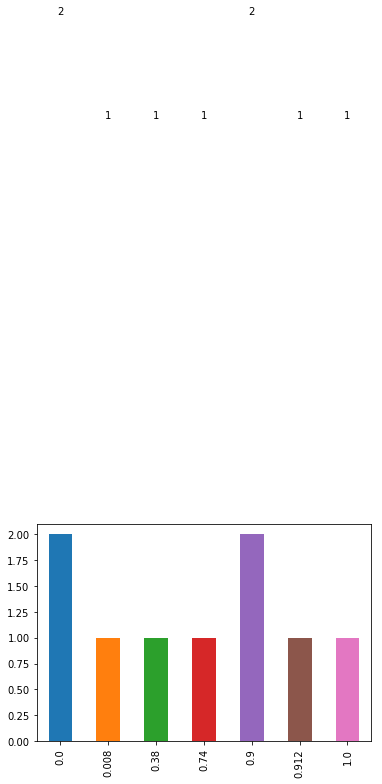

In [209]:
set_graph_weights(ds.lineage.graph, dataset,compute_jaccard_DF_index)
print_graph_scores(ds.lineage.graph)

In [187]:
pr_df

,rows,columns,versions,threshold,precision,recall
0,10000.0,10.0,5,0.000370,1.000000,0.714286
1,10000.0,10.0,5,0.003360,0.800000,0.571429
2,10000.0,10.0,5,0.099530,0.800000,0.444444
3,10000.0,10.0,5,1.000000,0.400000,0.285714
4,10000.0,10.0,10,0.000000,0.777778,0.368421
5,10000.0,10.0,10,0.041667,1.000000,0.204545
6,10000.0,10.0,10,0.062500,1.000000,0.204545
7,10000.0,10.0,10,0.066667,1.000000,0.204545
8,10000.0,10.0,10,0.100000,1.000000,0.214286
9,10000.0,10.0,10,0.125000,1.000000,0.204545


/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)
/home/suhail/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3755: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


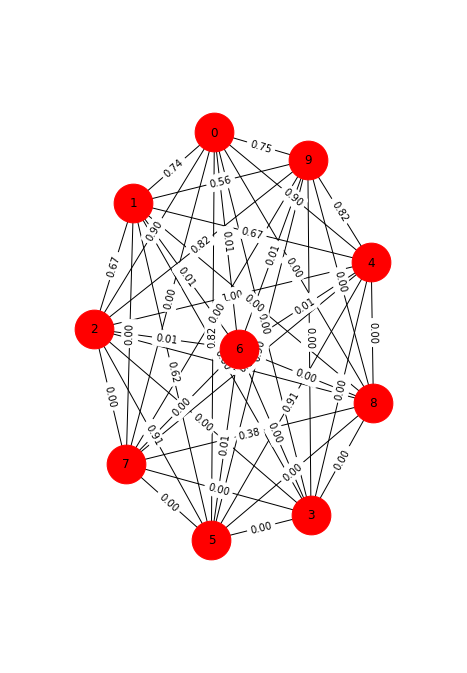

In [207]:
dataset = load_dataset_list(ds)
pairwise_jaccard = get_pairwise_similarity(dataset, compute_jaccard_DF_index, threshold=-1.0)
pw_jaccard_graph = generate_pairwise_graph(pairwise_jaccard)
draw_graph(pw_jaccard_graph, canvas=(1000,1000))

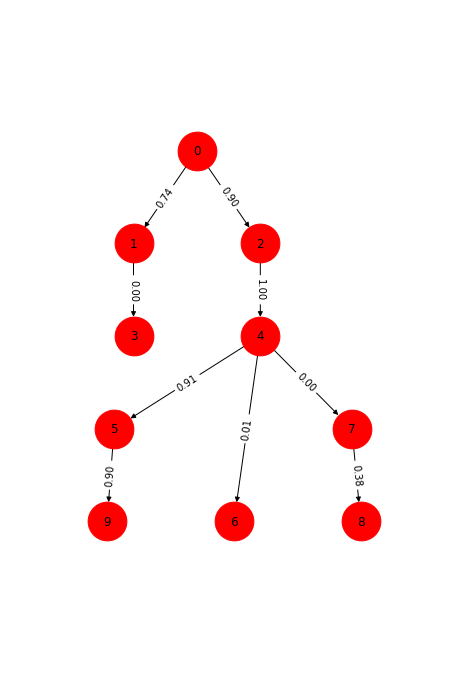

In [211]:
draw_graph(ds.lineage.graph, canvas=(100,100), root='0')